# ALIGNN Training Visualizations

In [71]:
ALIGNN_REGRESSION_OUTPUT_DIR = './data/sctk_structures/alignn_sc_regression_output'
ALIGNN_CLASSIFIER_OUTPUT_DIR = './data/sctk_structures/alignn_sc_classifier_output'
ALIGNN_CLASSIFIER_DATA_DIR = './data/sctk_structures/alignn_sc_classifier_data'

In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sctk.materials import Material

In [73]:
from pprint import pprint
output_contents = os.listdir(ALIGNN_REGRESSION_OUTPUT_DIR)
pprint(output_contents)

['checkpoint_159.pt',
 'checkpoint_160.pt',
 'checkpoint_79.pt',
 'checkpoint_80.pt',
 'config.json',
 'history_train.json',
 'history_val.json',
 'ids_train_val_test.json',
 'multi_out_predictions.json',
 'nogroups_multi_out_predictions.json',
 'test_data_data_range',
 'train_data_data_range',
 'val_data_data_range']


### Configure Matplotlib:

In [74]:
# This sets the pdf rendering to be pdflatex-compatible:
plt.rcParams.update({
    'pgf.texsystem' : 'pdflatex'
})

# use seaborn plot style:
plt.style.use('seaborn')

FIGURES_DIR = './figures2'

In [75]:
#import json
#with open(os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR, 
#                       'config.json')) as f:
#    pprint(json.load(f))

# Convergence of Model:

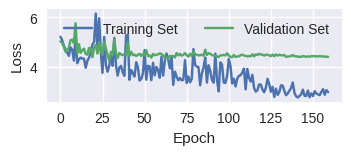

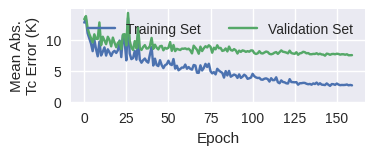

In [76]:
import json

train_file = os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR,
                          'history_train.json')
test_file = os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR,
                          'history_val.json')

with open(train_file, 'r') as f:
    train_data = json.loads(f.read())
with open(test_file, 'r') as f:
    test_data = json.loads(f.read())
    
train_loss = np.array(train_data['loss'])
train_mae = np.array(train_data['mae'])
test_loss = np.array(test_data['loss'])
test_mae = np.array(test_data['mae'])


plt.figure(figsize=(3.8,1.2))
plt.plot(np.log(train_loss), label='Training Set')
plt.plot(np.log(test_loss), label='Validation Set')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim((0,None))
#plt.yscale('log')
plt.legend(ncol=2)

# save figure:

if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_regression_W2loss.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

plt.figure(figsize=(3.8,1.2))
plt.plot(train_mae, label='Training Set')
plt.plot(test_mae, label='Validation Set')
plt.ylabel('Mean Abs.\nTc Error (K)')
plt.ylim((0,None))
plt.legend(ncol=2)
plt.xlabel('Epoch')

# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_regression_mae.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

In [77]:
import pandas as pd
results_file = os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR,
                 'nogroups_multi_out_predictions.json')
with open(results_file, 'r') as f:
    prediction_results_df = pd.DataFrame(json.load(f))
    
# parse target/prediction values from array:
test_set_data = []
for _, row in prediction_results_df.iterrows():
    test_set_data.append({
        'Material' : os.path.splitext(row['id'])[0],
        'Actual Tc (K)': max(1.0, float(row['target'][0])),
        'Predicted Tc (K)': max(1.0, float(row['predictions'][0])),
        'Actual Stddev (K)': max(1.0, row['target'][1]),
        'Predicted Stddev (K)': max(1.0, row['predictions'][1]),
    })

test_set_df = pd.DataFrame(test_set_data)
display(test_set_df[test_set_df['Actual Tc (K)'] > 5.0])

,Material,Actual Tc (K),Predicted Tc (K),Actual Stddev (K),Predicted Stddev (K)
3,YMo6Se8,6.380000,4.832146,1.000000,1.000000
4,BaCuS2,8.500000,7.577450,2.651974,3.875822
9,W3N4,11.000000,3.945513,1.000000,1.804703
11,WS2,7.266667,7.699573,1.646980,1.578357
12,Sb2Tl7,5.200000,3.299759,1.000000,1.000000
...,...,...,...,...,...
181,Y2BaCuO5,60.000000,31.960575,1.000000,6.968055
182,SrAlSi,5.305556,6.237451,1.799581,1.569427
184,MgAlB4,12.000000,14.722642,1.000000,9.082980
185,PH3,96.100000,100.979141,1.000000,9.253895


# Interpreting High-Error Predictions:

In [78]:
# sort results by mean absolute error (MAE):
prediction_errors = sorted([
    (abs(tgt - pred), tgt, pred, name)
    for name, tgt, pred in zip(test_set_df['Material'],
                               test_set_df['Actual Tc (K)'],
                               test_set_df['Predicted Tc (K)'])
])

# N = 8 #< -- number of samples to view:
# print('High error predictions (from test set): ')
# for mae, tgt, pred, name in reversed(prediction_errors[-N:]):
#     print(f'{name}\n  predicted: {pred:.3f}\n  actual:    {tgt:.3f}\n  abs err:   {mae:.3f}\n')

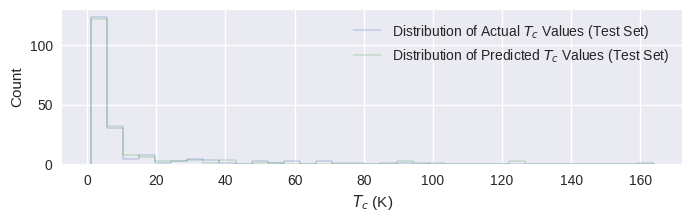

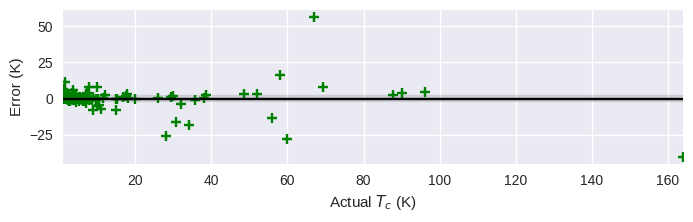

In [79]:
Tc_pred = np.array(test_set_df['Predicted Tc (K)'])
Tc_actual = np.array(test_set_df['Actual Tc (K)'])
Tc_std_pred = np.array(test_set_df['Predicted Stddev (K)'])
Tc_std_actual = np.array(test_set_df['Actual Stddev (K)'])

Tc_all = np.hstack([Tc_pred, Tc_actual])
Tc_range = (np.min(Tc_all), np.max(Tc_all))

Tc_std_all = np.hstack([Tc_std_pred, Tc_std_actual])
Tc_std_range = (np.min(Tc_std_all), np.max(Tc_std_all))

pred_hist, pred_bins = np.histogram(Tc_pred, bins=35, range=Tc_range)
actual_hist, actual_bins = np.histogram(Tc_actual, bins=35, range=Tc_range)

# Check if distribution of test data predictions matches that of the actual values: 
plt.figure(figsize=(8,2))
plt.stairs(actual_hist, actual_bins, label=r'Distribution of Actual $T_c$ Values (Test Set)')
plt.stairs(pred_hist, pred_bins,     label=r'Distribution of Predicted $T_c$ Values (Test Set)')
plt.xlabel(r'$T_c$ (K)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Visualize the magnitude of MAE versus T_c:
test_mae = np.mean(np.abs(Tc_pred - Tc_actual))
plt.figure(figsize=(8,2))
plt.fill_between(Tc_range, [-test_mae]*2, [test_mae]*2, color='k', alpha=0.1, label='MAE (Test Set)')
plt.scatter(Tc_actual, (Tc_pred - Tc_actual), c='g', marker='+')
plt.plot(Tc_range, [0,0], '-k')
plt.xlim(*Tc_range)
plt.xlabel(r'Actual $T_c$ (K)')
plt.ylabel('Error (K)')
plt.show()

test mean std: 6.659212693743935
lowtemp test mean std: 2.199748664229948


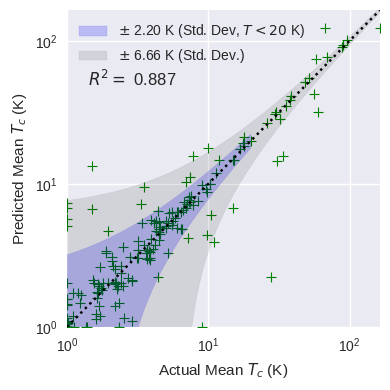

In [171]:
lowtemp_cutoff = 20
plt.figure(figsize=(4,4))
test_std = np.std(Tc_pred - Tc_actual)
lowtemp_test_std = np.std(Tc_pred[Tc_actual < lowtemp_cutoff] - Tc_actual[Tc_actual < lowtemp_cutoff])

print('test mean std:', test_std)
print('lowtemp test mean std:', lowtemp_test_std)
u_pts_range = (np.min(Tc_actual),np.max(Tc_actual))
u_pts = np.linspace(u_pts_range[0], u_pts_range[1], 1000)
lowtemp_u_pts = np.linspace(u_pts_range[0], lowtemp_cutoff, 1000)

plt.scatter(Tc_actual, Tc_pred, c='g', marker='+', linewidth=0.8)

plt.fill_between(lowtemp_u_pts, 
                 lowtemp_u_pts-lowtemp_test_std, 
                 lowtemp_u_pts+lowtemp_test_std, 
                 color='b', alpha=0.2, 
                 label=r'$\pm$ ' + f'{lowtemp_test_std:.2f} K ' + r'(Std. Dev, $T < 20$ K)')

plt.fill_between(u_pts, u_pts-test_std, u_pts+test_std, color='k', alpha=0.1, 
                 label=r'$\pm$ ' + f'{test_std:.2f} K (Std. Dev.)')

plt.plot(u_pts,u_pts, ':k')
plt.ylabel(r'Predicted Mean $T_c$ (K)', fontsize=11)
plt.xlabel(r'Actual Mean $T_c$ (K)', fontsize=11)
plt.xlim(u_pts_range)
plt.ylim(u_pts_range)

plt.yscale('log')
plt.xscale('log')
plt.legend()

r_squared = 1 -  np.sum((Tc_actual - Tc_pred)**2) / np.sum((Tc_actual - np.mean(Tc_actual))**2)
plt.annotate(r'$R^2 =$ ' + f'{r_squared:.3f}', 
             (0.22, 0.76),
             xycoords='figure fraction',
             fontsize=12)
plt.tight_layout()

# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_classifier_errs.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

test sigma std: 6.929544266305943


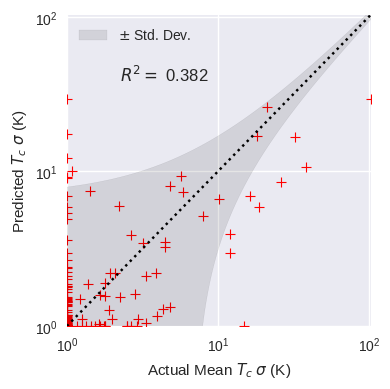

In [144]:
plt.figure(figsize=(4,4))
test_std_std = np.std(Tc_std_pred - Tc_std_actual)
print('test sigma std:', test_std_std)
u_pts_range = (np.min(Tc_std_actual),np.max(Tc_std_actual))
u_pts = np.linspace(u_pts_range[0], u_pts_range[1], 1000)
plt.scatter(Tc_std_actual, Tc_std_pred, c='r', marker='+', linewidth=0.8)
plt.fill_between(u_pts, u_pts-test_std_std, u_pts+test_std_std, color='k', 
                 alpha=0.1, label=r'$\pm$ Std. Dev.')
plt.plot(u_pts,u_pts, ':k')
plt.ylabel(r'Predicted $T_c$ $\sigma$ (K)', fontsize=11)
plt.xlabel(r'Actual Mean $T_c$ $\sigma$ (K)', fontsize=11)
plt.xlim(u_pts_range)
plt.ylim(u_pts_range)

plt.yscale('log')
plt.xscale('log')
plt.legend()

r_squared = 1 -  np.sum((Tc_std_actual - Tc_std_pred)**2) / np.sum((Tc_std_actual - np.mean(Tc_std_actual))**2)
plt.annotate(r'$R^2 =$ ' + f'{r_squared:.3f}', 
             (0.3, 0.77),
             xycoords='figure fraction',
             fontsize=12)
plt.tight_layout()

# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_classifier_sigma_errs.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

## Analyzing Classifier Model

In [81]:
from pprint import pprint
output_classifier_contents = os.listdir(ALIGNN_CLASSIFIER_OUTPUT_DIR)
pprint(output_classifier_contents)

['checkpoint_79.pt',
 'checkpoint_80.pt',
 'config.json',
 'history_train.json',
 'history_val.json',
 'ids_train_val_test.json',
 'id_prop.csv',
 'mad',
 'prediction_results_test_set.csv',
 'test_data_data_range',
 'train_data_data_range',
 'val_data_data_range']


In [131]:
classifier_test_set_df = pd.read_csv(
    os.path.join(ALIGNN_CLASSIFIER_OUTPUT_DIR,
                 'prediction_results_test_set.csv'))

display(classifier_test_set_df)

,id,target,prediction
0,Fe4C.poscar,0,0
1,Nd2Te4O11.poscar,0,0
2,Ti3In4.poscar,0,0
3,ZnPd2.poscar,0,0
4,Rb(TeMo)3.poscar,0,0
...,...,...,...
1201,NaLa.poscar,0,0
1202,YCl.poscar,0,1
1203,Lu5Rh4Ge10.poscar,1,1
1204,Eu3Tc.poscar,0,0


In [83]:
from itertools import product

confusion_matrix = {
    (true,pred) : []
    for true, pred in product([0,1],[0,1])
}
for _, row in classifier_test_set_df.iterrows():
    mat = Material(os.path.splitext(row['id'])[0])
    true = int(row['target'])
    pred = int(row['prediction'])
    confusion_matrix[(true, pred)].append(mat)
    
confusion_matrix_counts = {
    k : len(v) for k,v in confusion_matrix.items()
}

In [138]:
for k, vals in confusion_matrix.items():
    print(k, len(vals))
    
    for v in random.sample(vals, min(len(vals), 8)):
        print('   ' + v.str(pretty=False))

(0, 0) 917
   Sc3Nb
   Ba(SmSe2)2
   Yb5Sn3
   NdSmTl2
   YAsO4
   Th2Zn
   K3Rh
   Al13Co4
(0, 1) 95
   YbLuB24
   Ti3Ir
   CePb3
   SrAu5
   SrGe3
   MgAl
   Fe3CuAs2
   La2Re3B7
(1, 0) 92
   LaPd2Al3
   Ru2Zr
   In3Sn
   La3Sn
   PdZr2
   GeSi
   Hg2Na
   TaB2
(1, 1) 102
   TaSe3
   AlCu
   W2C
   Nb3
   RhGe
   Ce
   TlNi2Se2
   SrIr2


dict_keys(['accuracy', 'precision', 'recall', 'rocauc', 'roccurve', 'confmat'])


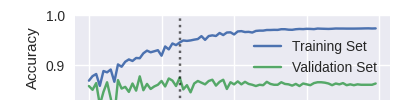

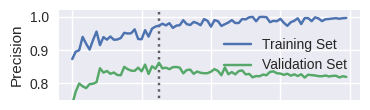

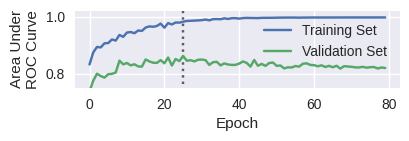

In [175]:
import json
%matplotlib inline

train_file = os.path.join(ALIGNN_CLASSIFIER_OUTPUT_DIR,
                          'history_train.json')
test_file = os.path.join(ALIGNN_CLASSIFIER_OUTPUT_DIR,
                          'history_val.json')

with open(train_file, 'r') as f:
    train_data = json.loads(f.read())
with open(test_file, 'r') as f:
    test_data = json.loads(f.read())
        
        
print(train_data.keys())

confmat = test_data['confmat'][-1]
p_0 = np.sum(confmat[0]) / np.sum(confmat)

train_accuracy = np.array(train_data['accuracy'])
train_auc = np.array(train_data['rocauc'])
train_precision = np.array(train_data['precision'])[:,0]
train_recall = np.array(train_data['recall'])[:,0]


val_accuracy = np.array(test_data['accuracy'])
val_auc = np.array(test_data['rocauc'])
vax_epoch_stop = np.argmax(val_auc)

plt.figure(figsize=(4.1,1.2))
plt.plot(train_accuracy, label='Training Set')
plt.plot(val_accuracy, label='Validation Set')
#plt.plot([0,len(train_accuracy)],[p_0]*2, ':k', label='Baseline')
plt.plot([vax_epoch_stop]*2, [0.5, 1.2], 'k:', alpha=.6)
plt.ylabel('\nAccuracy')
#plt.xlabel('Epoch')
plt.gca().set_xticklabels([])
plt.ylim((0.83,1.0))
plt.legend(loc='center right')
plt.tight_layout()

# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_classifier_acc.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

plt.figure(figsize=(3.8,1.2))
plt.plot([vax_epoch_stop]*2, [0.5, 1.2], 'k:', alpha=.6)
plt.plot(train_precision, label='Training Set')
plt.plot(val_auc, label='Validation Set')
plt.ylabel('Precision')
plt.ylim((0.75,1.02))
plt.legend(loc='center right')
#plt.xlabel('Epoch')
plt.gca().set_xticklabels([])
plt.tight_layout()


# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_classifier_prec.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()


plt.figure(figsize=(4.2,1.5))
plt.plot([vax_epoch_stop]*2, [0.5, 1.2], 'k:', alpha=.6)
plt.plot(train_auc, label='Training Set')
plt.plot(val_auc, label='Validation Set')
plt.ylabel('Area Under\nROC Curve')
plt.ylim((0.75,1.02))
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.tight_layout()

# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_classifier_auroc.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

In [85]:
CLASSIFIER_MODEL_PATH = os.path.join(ALIGNN_CLASSIFIER_OUTPUT_DIR, 'checkpoint_80.pt')
CLASSIFIER_CONFIG_PATH = os.path.join(ALIGNN_CLASSIFIER_OUTPUT_DIR, 'config.json')

# with open(CLASSIFIER_CONFIG_PATH, 'r') as f:
#     config = json.load(f)
# from pprint import pprint
# pprint(config)

In [86]:
from alignn.models.alignn import ALIGNN, ALIGNNConfig
from jarvis.core.atoms import Atoms
from alignn.graphs import Graph
from tqdm import tqdm
import torch
import json

from alignn.train import thresholded_output_transform

def load_model(path, config_path=None, model_config=None):
    device = "cpu"
    if torch.cuda.is_available():
        device = torch.device("cuda")
    if config_path:
        with open(config_path, 'r') as f:
            model_config = json.load(f)
    if model_config:
        alignn_config = ALIGNNConfig(**model_config['model'])
        print(dict(alignn_config))
        model = ALIGNN(alignn_config)
    else:
        model = ALIGNN(ALIGNNConfig(name="alignn", output_features=1))
    model.load_state_dict(torch.load(path, map_location=device)["model"])
    model.eval()
    
    return model

def classifier_serve(model, poscar_file):
    cutoff = 8.0
    max_neighbors = 12
    device = "cpu"
    if torch.cuda.is_available():
        device = torch.device("cuda")
    
    atoms = Atoms.from_poscar(poscar_file)
    g, lg = Graph.atom_dgl_multigraph(
        atoms, cutoff=float(cutoff), max_neighbors=max_neighbors,
    )
    out_data = (
        model([g.to(device), lg.to(device)])
        .detach()
        .cpu()
        .numpy()
        .flatten()
        .tolist()
    )
    
    # Note: The model returns unrounded logits, which
    # must be converted into probabilities:
    return np.exp(np.array(out_data))

def regression_serve(model, poscar_file):
    cutoff = 8.0
    max_neighbors = 12
    device = "cpu"
    if torch.cuda.is_available():
        device = torch.device("cuda")
    
    atoms = Atoms.from_poscar(poscar_file)
    g, lg = Graph.atom_dgl_multigraph(
        atoms, cutoff=float(cutoff), max_neighbors=max_neighbors,
    )
    out_data = (
        model([g.to(device), lg.to(device)])
        .detach()
        .cpu()
        .numpy()
        .flatten()
        .tolist()
    )
    
    return out_data

In [87]:
model = load_model(CLASSIFIER_MODEL_PATH, CLASSIFIER_CONFIG_PATH)

from sctk.databases import MaterialsProject
import random

test_set_raw_predictions = []
for _, row in tqdm(classifier_test_set_df.iterrows()):
    mat_file = os.path.join(ALIGNN_CLASSIFIER_DATA_DIR, row['id'].strip())
    if os.path.exists(mat_file):
        x = classifier_serve(model, mat_file)
        test_set_raw_predictions.append((row['id'], row['target'], row['prediction'], x[0],  x[1]))


{'name': 'alignn', 'alignn_layers': 6, 'gcn_layers': 6, 'atom_input_features': 92, 'edge_input_features': 80, 'triplet_input_features': 40, 'embedding_features': 128, 'hidden_features': 256, 'output_features': 1, 'link': 'identity', 'zero_inflated': False, 'classification': True, 'num_classes': 2}


1206it [00:39, 30.57it/s]


In [128]:
test_set_raw_predictions_df = pd.DataFrame(test_set_raw_predictions, 
                                           columns=['Id', 'Actual', 'Prediction', 'Raw(1)', 'Raw(2)'])
display(test_set_raw_predictions_df[:50])

,Id,Actual,Prediction,Raw(1),Raw(2)
0,NbSn2.poscar,1,0,9.971874e-01,2.812602e-03
1,Y2Ir3Si5.poscar,1,1,2.970177e-07,9.999998e-01
2,SSeTa.poscar,1,1,9.953533e-08,9.999999e-01
3,SnMo6S8.poscar,1,1,1.424124e-02,9.857588e-01
4,NZr.poscar,1,0,9.974698e-01,2.530283e-03
5,As2Pd5.poscar,1,0,9.999757e-01,2.431539e-05
6,In3Sn.poscar,1,0,9.999999e-01,6.238476e-08
7,Ge3U5.poscar,1,0,1.000000e+00,8.446709e-09
8,LaOCoAs.poscar,1,1,3.215241e-07,9.999996e-01
9,AlH3.poscar,0,1,3.075159e-04,9.996925e-01


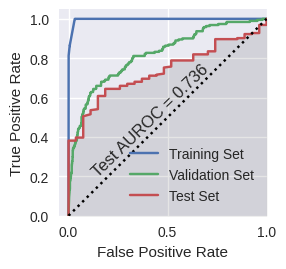

In [111]:
%matplotlib inline
from sklearn import metrics

fpr, tpr, thrs = metrics.roc_curve(
                            np.array(test_set_raw_predictions_df['Actual']),  
                            np.array(test_set_raw_predictions_df['Raw(1)']),
                            pos_label=1)
estimated_test_roc = (fpr,tpr, thrs)

estimated_auroc = metrics.roc_auc_score(np.array(test_set_raw_predictions_df['Actual']),  
                            np.array(test_set_raw_predictions_df['Raw(1)']))

train_accuracy = np.array(train_data['accuracy'])
train_auc = np.array(train_data['rocauc'])
val_accuracy = np.array(test_data['accuracy'])
val_auc = np.array(test_data['rocauc'])

train_roc = np.array(train_data['roccurve'][-1])
train_roc_init = np.array(train_data['roccurve'][0])
val_roc = np.array(test_data['roccurve'][-1])
val_roc_init = np.array(test_data['roccurve'][0])

plt.figure(figsize=(3,2.8))
plt.plot(train_roc[0], train_roc[1], label='Training Set')
plt.plot(val_roc[0], val_roc[1], label='Validation Set')
plt.fill_between(estimated_test_roc[0], estimated_test_roc[1], color='k', alpha=0.1)
plt.plot(estimated_test_roc[0], estimated_test_roc[1], label='Test Set')

plt.plot([0,1],[0,1],'k:')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim((0,None))
plt.xlim((None,1))
plt.annotate(f'Test AUROC = {estimated_auroc:.3f}', (0.3,0.33), xycoords='figure fraction', 
             fontsize=12, rotation=44)
plt.legend()
plt.tight_layout()

# save figure:
if FIGURES_DIR is not None:
    figpath = os.path.join(FIGURES_DIR,'supercon2_classifier_roc.pdf')
    plt.savefig(figpath, backend='pgf')
plt.show()

In [33]:
REGRESSION_MODEL_PATH = os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR, 'checkpoint_160.pt')
REGRESSION_CONFIG_PATH = os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR, 'config.json')
REGRESSION_DATA_DIR = './data/sctk_structures/alignn_sc_regression_data'

reg_model = load_model(REGRESSION_MODEL_PATH, REGRESSION_CONFIG_PATH)

{'name': 'alignn', 'alignn_layers': 6, 'gcn_layers': 6, 'atom_input_features': 92, 'edge_input_features': 80, 'triplet_input_features': 40, 'embedding_features': 128, 'hidden_features': 256, 'output_features': 2, 'link': 'identity', 'zero_inflated': False, 'classification': False, 'num_classes': 2}


In [46]:
from glob import glob
train_files = glob(os.path.join(REGRESSION_DATA_DIR, '*.poscar'))
test_files = random.sample(train_files, k=int(0.1*len(train_files)))

test_id_prop = pd.read_csv(os.path.join(REGRESSION_DATA_DIR, 'id_prop.csv'),
                           names=['id', '1', '2'])
test_id_prop = {
    row['id'].strip() : [float(row['1']), float(row['2'])]
    for _, row in test_id_prop.iterrows()
}

In [50]:
results = []
for file in tqdm(test_files):
    name = os.path.split(file)[-1]
    if name in test_id_prop:
        pred = regression_serve(reg_model, file)
        results.append({
            'id' : name,
            'target' : test_id_prop[name.strip()],
            'predictions' : list(pred)
        })

100%|██████████████████████████████████████████████████████| 202/202 [00:37<00:00,  5.46it/s]

[{'id': 'AsNb3.poscar', 'target': [2.353333333, 0.4249291785304432], 'predictions': [1.481463074684143, 1.1050268411636353]}, {'id': 'Bi3Rh.poscar', 'target': [3.175, 0.3149606299212598], 'predictions': [3.0345661640167236, 0.5989835262298584]}, {'id': 'CuRh2S4.poscar', 'target': [4.297, 0.0591515541698575], 'predictions': [4.675163269042969, 0.6583958864212036]}, {'id': 'YMo6Se8.poscar', 'target': [6.38, 0.1567398119122257], 'predictions': [4.832145690917969, 0.7380787134170532]}, {'id': 'BaCuS2.poscar', 'target': [8.5, 2.651973741768707], 'predictions': [7.577450275421143, 3.875821828842163]}, {'id': 'TaSe2.poscar', 'target': [1.1260714285714288, 1.7589629586760736], 'predictions': [0.28334546089172363, 0.8015620708465576]}, {'id': 'PdSbTe.poscar', 'target': [1.2, 0.8333333333333334], 'predictions': [1.7190347909927368, 0.9219986796379089]}, {'id': 'LaPdIn.poscar', 'target': [1.6, 0.625], 'predictions': [1.1485381126403809, 0.4420715570449829]}, {'id': 'LaN.poscar', 'target': [1.7700

In [57]:
results_df = pd.DataFrame(results)
export_path = os.path.join(ALIGNN_REGRESSION_OUTPUT_DIR,
                           'nogroups_multi_out_predictions.json')
with open(export_path, 'w') as of:
    json.dump(results,of)

,id,target,predictions
0,AsNb3.poscar,"[2.353333333, 0.4249291785304432]","[1.481463074684143, 1.1050268411636353]"
1,Bi3Rh.poscar,"[3.175, 0.3149606299212598]","[3.0345661640167236, 0.5989835262298584]"
2,CuRh2S4.poscar,"[4.297, 0.0591515541698575]","[4.675163269042969, 0.6583958864212036]"
3,YMo6Se8.poscar,"[6.38, 0.1567398119122257]","[4.832145690917969, 0.7380787134170532]"
4,BaCuS2.poscar,"[8.5, 2.651973741768707]","[7.577450275421143, 3.875821828842163]"
...,...,...,...
182,SrAlSi.poscar,"[5.305555555555555, 1.7995806481535557]","[6.23745059967041, 1.5694266557693481]"
183,HfOs2.poscar,"[2.27, 0.4405286343612334]","[1.8383830785751343, 0.7010310292243958]"
184,MgAlB4.poscar,"[12.0, 0.0833333333333333]","[14.722641944885254, 9.082980155944824]"
185,PH3.poscar,"[96.1, 0.6774498749025497]","[100.97914123535156, 9.253894805908203]"


In [56]:
help(json.dump)

Help on function dump in module json:

dump(obj, fp, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    Serialize ``obj`` as a JSON formatted stream to ``fp`` (a
    ``.write()``-supporting file-like object).
    
    If ``skipkeys`` is true then ``dict`` keys that are not basic types
    (``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
    instead of raising a ``TypeError``.
    
    If ``ensure_ascii`` is false, then the strings written to ``fp`` can
    contain non-ASCII characters if they appear in strings contained in
    ``obj``. Otherwise, all such characters are escaped in JSON strings.
    
    If ``check_circular`` is false, then the circular reference check
    for container types will be skipped and a circular reference will
    result in an ``RecursionError`` (or worse).
    
    If ``allow_nan`` is false, then it will be a ``ValueError`` to
    seriali